# Capstone Project - H&M Recommendation

Ana Berta Vegas; Ester Iglesias; Raquel Dominguez

## Relacions entre datasets

En aquest notbook relacionarem la informació més important de cada un dels datasets treballats, per poder estudiar-los de manera conjunta.

En primer lloc, importem les llibreries necessàries:

In [1]:
#!pip install pandasql

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from pandasql import sqldf

Llegim els datasets:

In [3]:
df_customers = pd.read_csv('customers.csv')
df_articles = pd.read_csv('articles.csv')
df_transactions = pd.read_csv('transactions_train.csv')

Borrem les dades repetides del dataset de transactions:

In [4]:
df_transactions.drop_duplicates(inplace=True, ignore_index=True)

**Transactions & Articles**

En primer lloc, relacionarem el dataset d'articles amb el de transactions. Per fer-ho, primer creem un nou dataset a partir del de les transaccions, seleccionant l'indentificador de cada un dels articles que apareix, i la seva quantitat venguda:

In [5]:
df_quatity_per_article = df_transactions["article_id"].value_counts()
df_quatity_per_article.head()

706016001    42672
706016002    30862
372860001    29337
610776002    25234
759871002    23799
Name: article_id, dtype: int64

In [6]:
df_quatity_per_article=df_quatity_per_article.reset_index()
df_quatity_per_article.rename(columns = {"article_id":"quantity","index":"article_id"}, inplace=True)
df_quatity_per_article.head()

,article_id,quantity
0,706016001,42672
1,706016002,30862
2,372860001,29337
3,610776002,25234
4,759871002,23799


Relacionem el dataset anterior amb el dataset d'articles. Seleccionem primer, la informació que volem:

In [7]:
df_articles = df_articles[["article_id", "prod_name", "product_type_name", "product_group_name", "colour_group_name", "department_name", "index_name"]]

Ajuntem els dos datasets mitjançant l'*article_id*, que és l'identificador que es repeteix: 

In [8]:
df_article_details = sqldf("""SELECT *
    FROM df_quatity_per_article t
    INNER JOIN df_articles a
    on t.article_id = a.article_id
""")
df_article_details.head(10)

,article_id,quantity,article_id,prod_name,product_type_name,product_group_name,colour_group_name,department_name,index_name
0,706016001,42672,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Trousers,Divided
1,706016002,30862,706016002,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Trousers,Divided
2,372860001,29337,372860001,7p Basic Shaftless,Socks,Socks & Tights,Black,Shopbasket Socks,Lingeries/Tights
3,610776002,25234,610776002,Tilly (1),T-shirt,Garment Upper body,Black,Jersey Basic,Ladieswear
4,759871002,23799,759871002,Tilda tank,Vest top,Garment Upper body,Black,EQ Divided Basics,Divided
5,372860002,22472,372860002,7p Basic Shaftless,Socks,Socks & Tights,White,Shopbasket Socks,Lingeries/Tights
6,464297007,21782,464297007,Greta Thong Mynta Low 3p,Underwear bottom,Underwear,Black,Casual Lingerie,Lingeries/Tights
7,399223001,19604,399223001,Curvy Jeggings HW Ankle,Trousers,Garment Lower body,Black,Denim Trousers,Divided
8,720125001,18975,720125001,SUPREME RW tights,Leggings/Tights,Garment Lower body,Black,Ladies Sport Bottoms,Sport
9,610776001,18777,610776001,Tilly (1),T-shirt,Garment Upper body,White,Jersey Basic,Ladieswear


Analitzem el dataframe anterior:

En primer lloc, observem que, tal i com hem vist en el notebook de Transactions, l'article que més vegades s'ha comprat és el que té com a id 706016001. Ara però, sabem que aquest article són uns pantalons de color negre, que tenen el nom de Jade HW Skinny Denim TRS. És a dir, tenim molta més informació.

A més, observem que el segon article més vengut (706016002) es tracta d'exactament el mateix producte però d'un altre color, és informació que simplement amb la id de l'article no es podia deduir.

Veiem quins són els productes més exitosos:

In [9]:
df = pd.DataFrame({'Articles': df_article_details.groupby("prod_name")["quantity"].sum().index,
                   'Quantity': df_article_details.groupby("prod_name")["quantity"].sum().values
                  })
df = df.sort_values(['Quantity'], ascending=False)
df_head = df.head(10)
df_head

,Articles,Quantity
20420,Jade HW Skinny Denim TRS,147246
25331,Luna skinny RW,125847
42311,Timeless Midrise Brief,101611
42269,Tilly (1),94027
8264,Cat Tee.,74437
39073,Simple as That Triangle Top,64772
38560,Shake it in Balconette,64214
11838,Despacito,64023
42258,Tilda tank,63286
29785,Nora T-shirt,60138


I de manera gràfica:

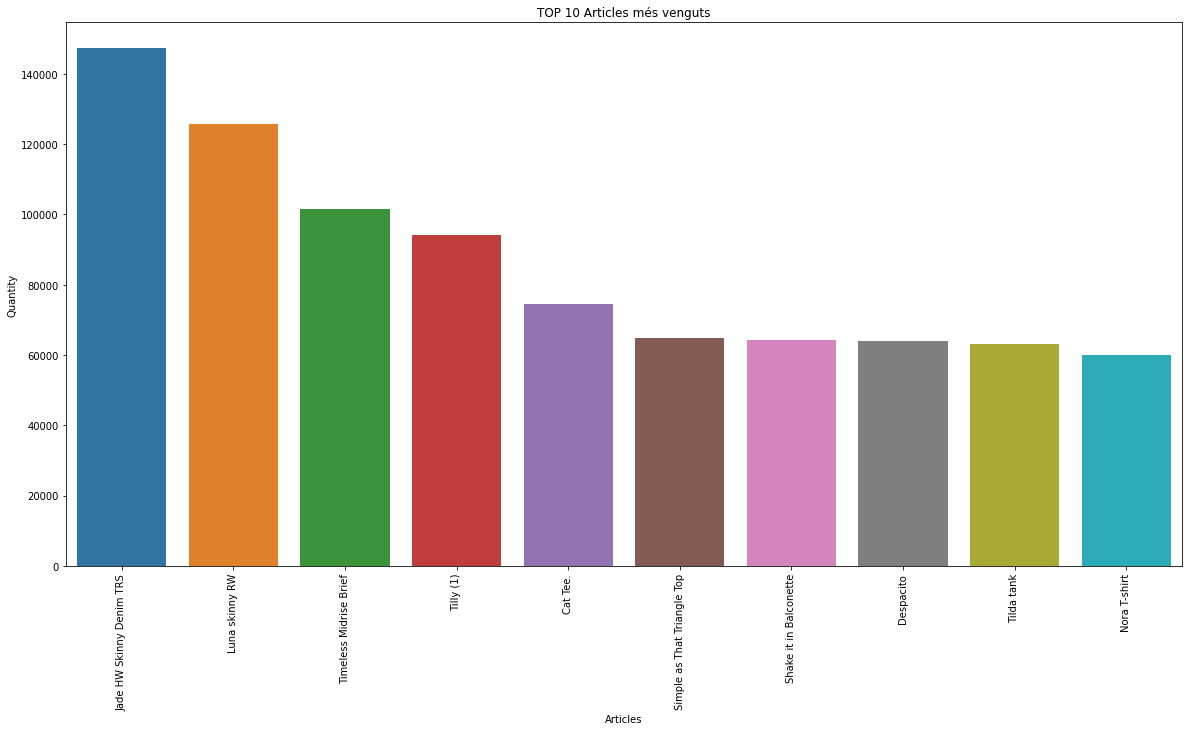

In [10]:
plt.figure(figsize = (20,10))
plt.title(f"TOP 10 Articles més venguts")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Articles', y="Quantity", data=df_head)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Per altra banda, els productes que menys es venen són:

In [11]:
df_tail = df.tail(10)
df_tail

,Articles,Quantity
17793,Greger LS Body,1
17873,Gunde fancy,1
2510,Anna waterproof boot BG,1
26687,Mamma Mia PRICE,1
38549,Shaftless lace sock 2-p,1
17853,Gudrun LS,1
17855,Guernsey Sweater,1
17858,Guido leggings,1
2474,Anja VALENTINE Tulle skirt,1
34822,Rigby rhine earring,1


Veiem-ho gràficament:

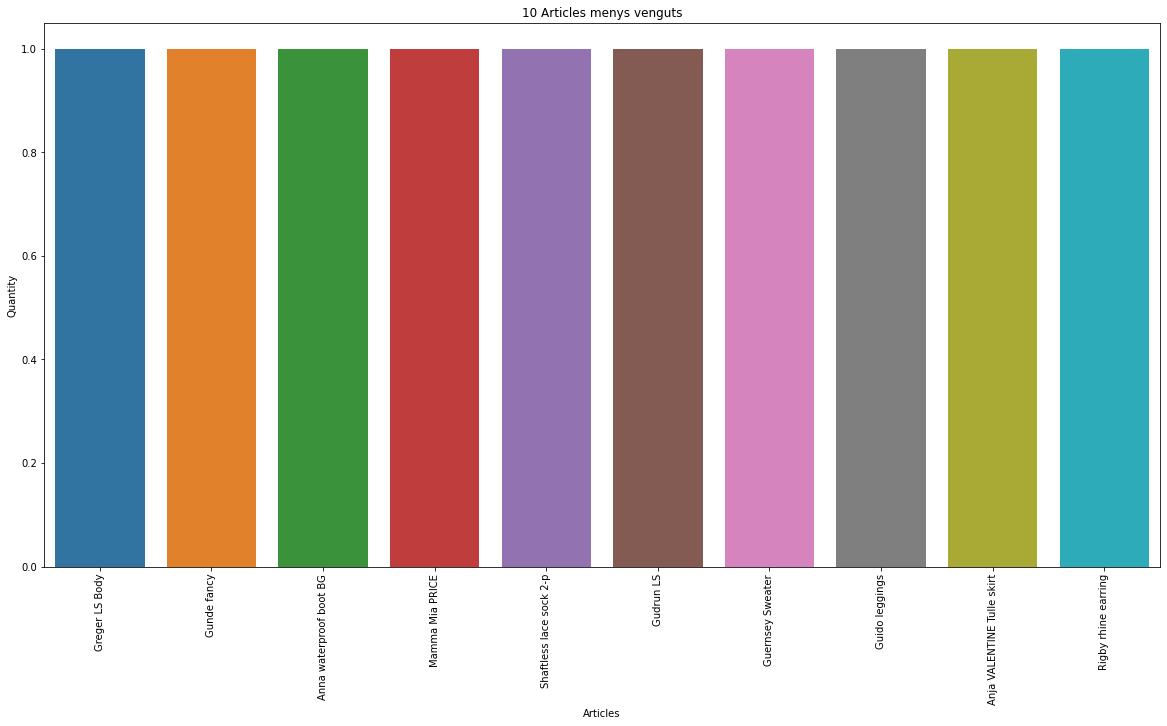

In [12]:
plt.figure(figsize = (20,10))
plt.title(f"10 Articles menys venguts")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Articles', y="Quantity", data=df_tail)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Observem que tots els articles menys venguts s'han comprat només una vegada. Quantifiquem quants són i els identifiquem:

In [13]:
df[df["Quantity"]==1]

,Articles,Quantity
151,10P SS Body pack,1
22489,Kim 2p padded E&F,1
7656,CW Zeni Asymetric Skirt,1
7593,CSP W Carol,1
1038,AK Garland Dress,1
...,...,...
17853,Gudrun LS,1
17855,Guernsey Sweater,1
17858,Guido leggings,1
2474,Anja VALENTINE Tulle skirt,1


Hi ha un total de 1624 articles que només s'han vengut una vegada. Calculem quin percentatge del total representa:

In [14]:
len(df[df["Quantity"]==1])/len(df)*100

3.685066361958337

Un 3.5% del total dels productes diferents.

Veiem ara, quin és el tipus de producte que s'ha vengut més vegades:

In [15]:
df = pd.DataFrame({'Product Type': df_article_details.groupby("product_type_name")["quantity"].sum().index,
                   'Quantity': df_article_details.groupby("product_type_name")["quantity"].sum().values
                  })
df = df.sort_values(['Quantity'], ascending=False)
df_head = df.head(10)
df_head

,Product Type,Quantity
111,Trousers,3725520
32,Dress,2918786
99,Sweater,2614740
104,T-shirt,2003299
107,Top,1465853
11,Blouse,1389973
120,Vest top,1258605
15,Bra,1237163
86,Shorts,1041512
8,Bikini top,961314


I de manera gràfica:

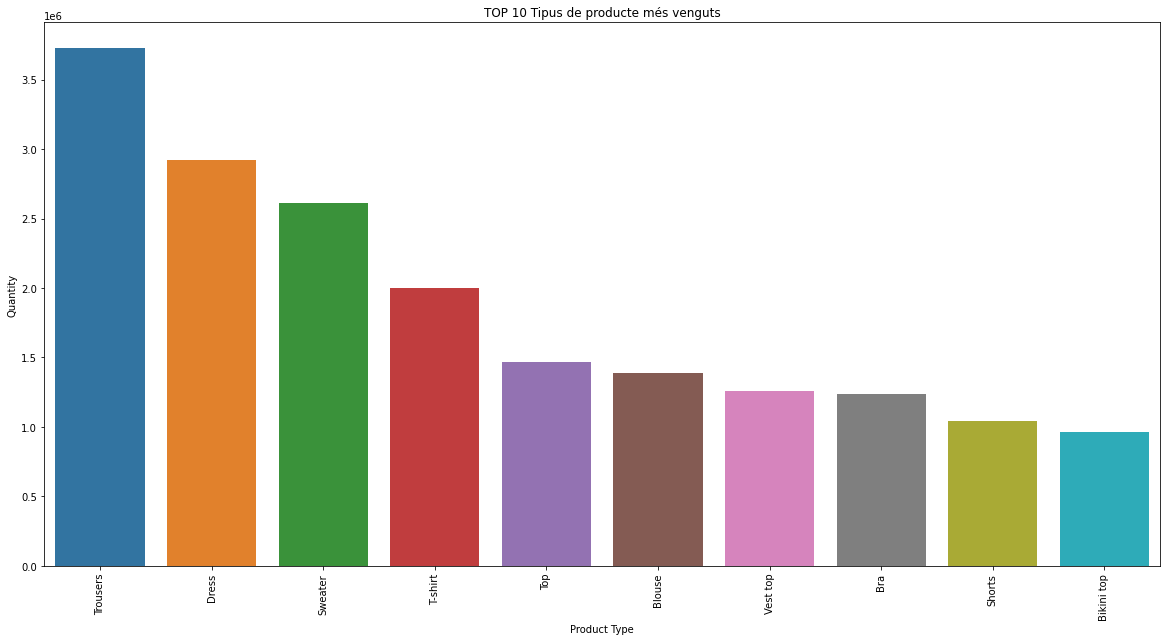

In [16]:
plt.figure(figsize = (20,10))
plt.title(f"TOP 10 Tipus de producte més venguts")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Quantity", data=df_head)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Per altra banda, el tipus de producte que menys es ven és:

In [17]:
df_tail = df.tail(10)
df_tail

,Product Type,Quantity
96,Stain remover spray,36
122,Washing bag,32
128,Wood balls,27
9,Blanket,26
29,Cushion,24
36,Eyeglasses,23
109,Towel,18
20,Bumbag,15
110,Toy,5
25,Clothing mist,4


Veiem-ho de manera gràfica:

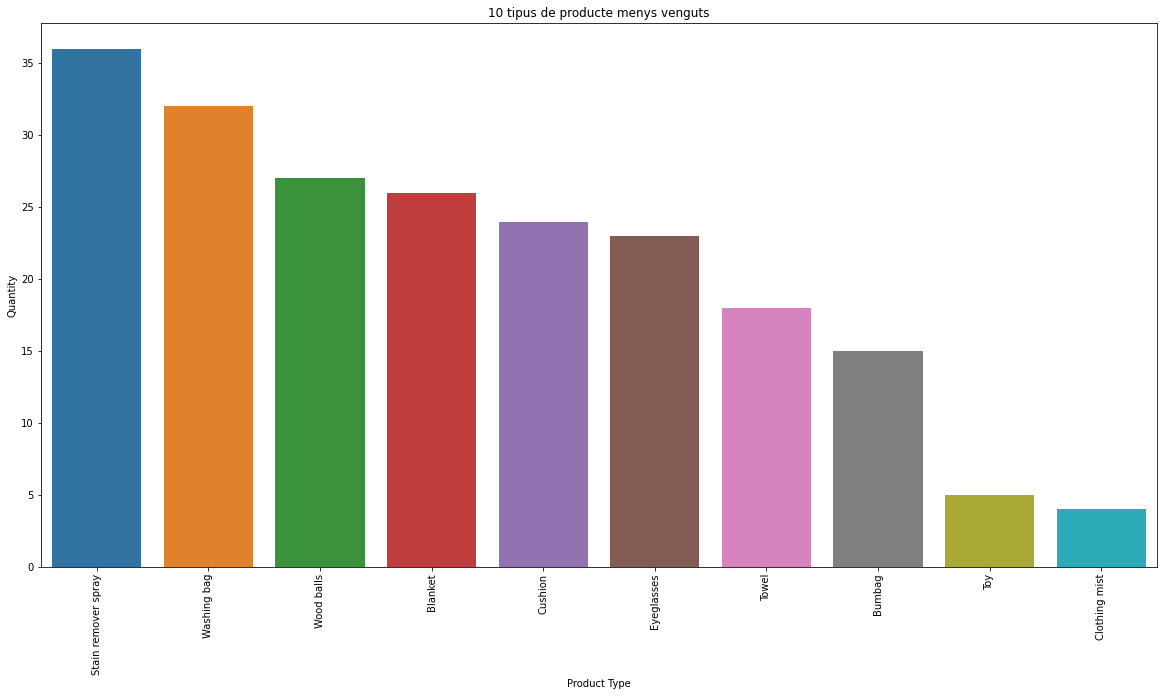

In [18]:
plt.figure(figsize = (20,10))
plt.title(f"10 tipus de producte menys venguts")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Quantity", data=df_tail)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Seguint amb l'anàlisi, veiem ara, quin és el color que predomina en els productes:

In [19]:
df = pd.DataFrame({'Color Group': df_article_details.groupby("colour_group_name")["quantity"].sum().index,
                   'Quantity': df_article_details.groupby("colour_group_name")["quantity"].sum().values
                  })
df = df.sort_values(['Quantity'], ascending=False)
df_head = df.head(10)
df_head

,Color Group,Quantity
1,Black,9875765
47,White,3036408
5,Dark Blue,1980381
19,Light Beige,1161305
2,Blue,966133
0,Beige,845580
20,Light Blue,819086
24,Light Pink,795116
17,Grey,778863
29,Off White,772537


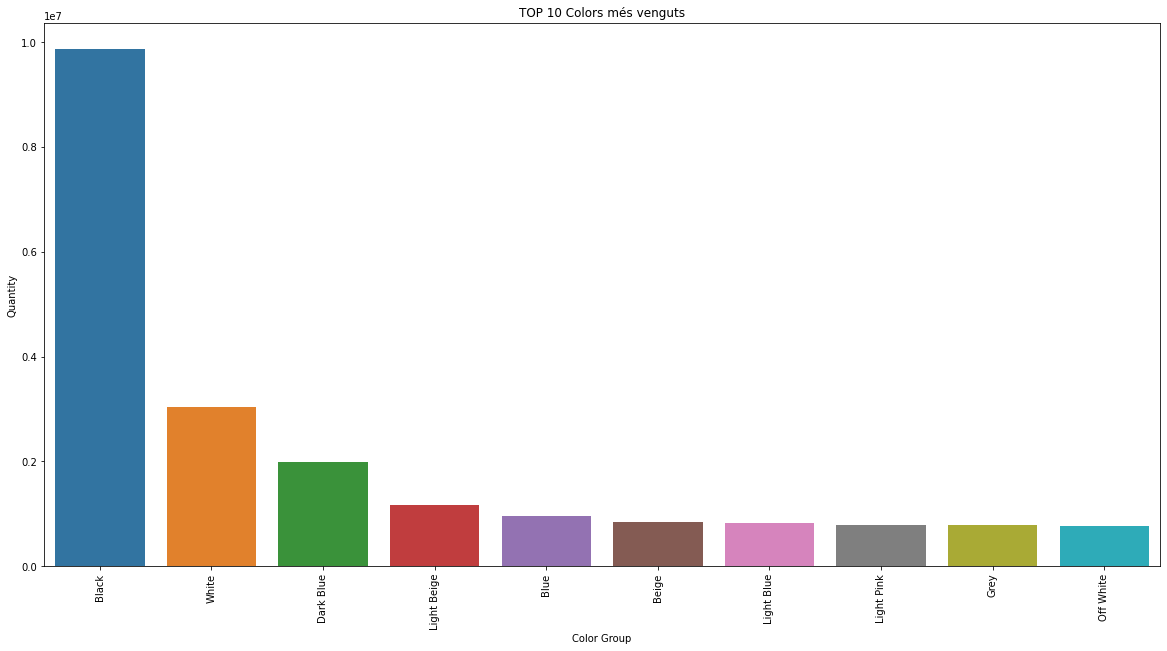

In [20]:
plt.figure(figsize = (20,10))
plt.title(f"TOP 10 Colors més venguts")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Color Group', y="Quantity", data=df_head)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Observem que destaca clarament el color negre. Veiem quin percentatge d'articles venguts són d'aquest color:

In [21]:
df_head[df_head["Color Group"] == "Black"]["Quantity"]/df["Quantity"].sum() * 100

1    34.274881
Name: Quantity, dtype: float64

Un 34,7% dels articles venguts són de color negre. Veiem ara, de quin color són els articles que menys es compren:

In [22]:
df_tail = df.tail(10)
df_tail

,Color Group,Quantity
34,Other Orange,25908
31,Other,19566
37,Other Red,14028
33,Other Green,13129
3,Bronze/Copper,9113
44,Transparent,8077
32,Other Blue,7448
36,Other Purple,6886
46,Unknown,4972
38,Other Turquoise,539


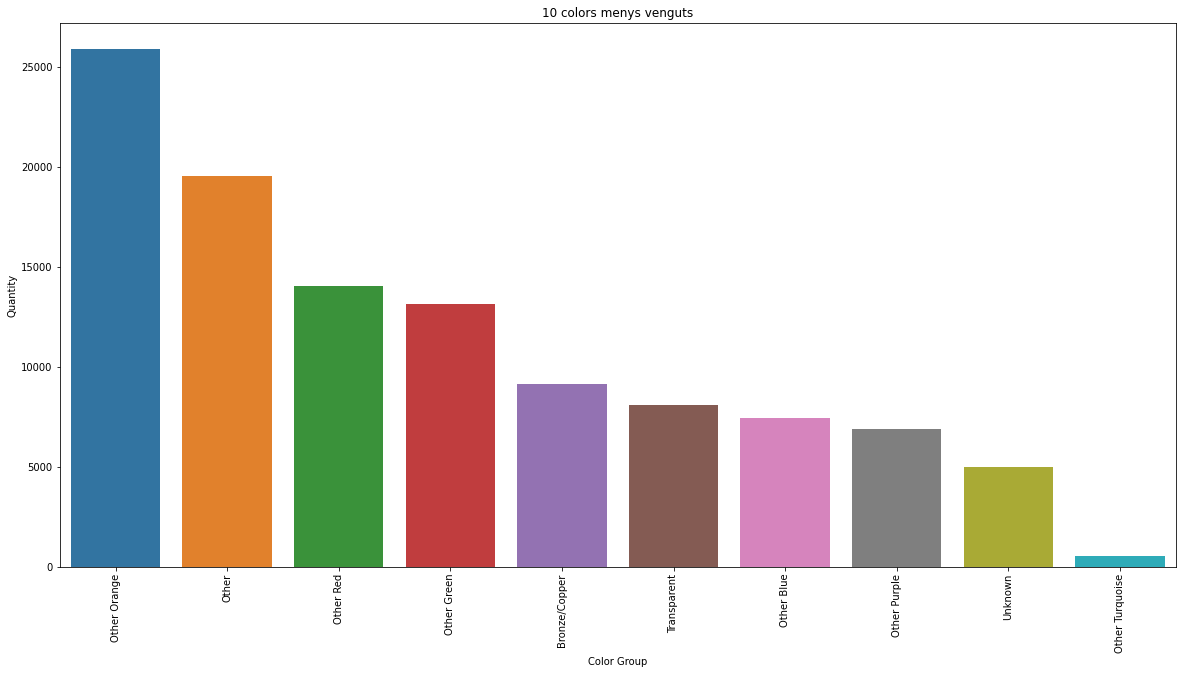

In [23]:
plt.figure(figsize = (20,10))
plt.title(f"10 colors menys venguts")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Color Group', y="Quantity", data=df_tail)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

**Transactions & Customers**

Relacionem ara, el dataset de transactions amb el de customers. Ens quedem primer, amb la informació que volem:

In [24]:
df_transactions_curt = df_transactions[["customer_id", "sales_channel_id"]]
df_transactions_curt

,customer_id,sales_channel_id
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,2
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,2
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,2
...,...,...
28813414,fff2282977442e327b45d8c89afde25617d00124d0f999...,2
28813415,fff2282977442e327b45d8c89afde25617d00124d0f999...,2
28813416,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,1
28813417,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,1


In [25]:
df_customers_curt = df_customers[["customer_id", "age", "club_member_status", "Active"]]
df_customers_curt

,customer_id,age,club_member_status,Active
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,ACTIVE,NaN
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,ACTIVE,NaN
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,ACTIVE,NaN
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,ACTIVE,NaN
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,ACTIVE,1.0
...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,24.0,ACTIVE,NaN
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,21.0,ACTIVE,NaN
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,21.0,ACTIVE,1.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,18.0,ACTIVE,1.0


Ajuntem els dos datasets mitjançant l'*customer_id*, que és l'identificador que es repeteix: 

In [26]:
df_customer_details = df_transactions_curt.set_index("customer_id").join(df_customers_curt.set_index("customer_id"))
df_customer_details.head(10)

,sales_channel_id,age,club_member_status,Active
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN


Modifiquem les variables segons el seu tipus:

In [27]:
df_customer_details["Active"] = df_customer_details["Active"].astype("category")
df_customer_details["club_member_status"] = df_customer_details["club_member_status"].astype("category")

Estudiem com es comporta l'edat dels clients que compren de manera online:

In [28]:
df_online = df_customer_details[df_customer_details["sales_channel_id"]==2]
df_online

,sales_channel_id,age,club_member_status,Active
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2,49.0,ACTIVE,NaN
...,...,...,...,...
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a,2,18.0,ACTIVE,1.0
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a,2,18.0,ACTIVE,1.0
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a,2,18.0,ACTIVE,1.0


In [29]:
df_online.describe()

,sales_channel_id,age
count,19686806.0,1.961012e+07
mean,2.0,3.572865e+01
std,0.0,1.270646e+01
min,2.0,1.600000e+01
25%,2.0,2.600000e+01
50%,2.0,3.100000e+01
75%,2.0,4.700000e+01
max,2.0,9.900000e+01


Observem que la mitjana d'edat dels clients que compren Online es de 35,7 anys. Veiem si hi ha diferències significatives amb els que ho fan de manera física:

In [30]:
df_fisic = df_customer_details[df_customer_details["sales_channel_id"]==1]
df_fisic.head()

,sales_channel_id,age,club_member_status,Active
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1,49.0,ACTIVE,NaN


In [31]:
df_fisic.describe()

,sales_channel_id,age
count,9126613.0,9.076027e+06
mean,1.0,3.667014e+01
std,0.0,1.362760e+01
min,1.0,1.600000e+01
25%,1.0,2.500000e+01
50%,1.0,3.200000e+01
75%,1.0,4.900000e+01
max,1.0,9.900000e+01


La mitjana d'edat dels consumidors físics és de 36,6 anys, pel que la diferència entre els dos canals no és significativa.

Estudiem ara, quin percentatge de transaccions realitzen els clients amb l'estat ACTIVE de la variable *club_member_status*:

In [32]:
len(df_customer_details[df_customer_details["club_member_status"] == "ACTIVE"])/len(df_customer_details)*100

97.7951210857691

Més del 97% de les transaccions estan realitzades per clients que són socis del club H&M. Té sentit, ja que anteriorment, a l'anàlisi del dataset dels consumidors hem vist que més del 92% eren socis.

Veiem ara, si el fet de rebre comunicació de la revista de moda afecta a les compres:

In [33]:
len(df_customer_details[df_customer_details["Active"] == 1])/len(df_customer_details)*100

42.25123370468461

Aproximadament un 42% de les compres estan realitzades per clients que reben comunicació. Tenint en compte que només un 33,8% de consumidors la reben, considerem que és prou important.